<a href="https://colab.research.google.com/github/shivamrahane/shivamrahane-Online-retail-customer-segmentation-Clustering-shivamkumar/blob/main/Online_retail_customer_segmentation_(Clustering)_(shivamkumar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Online retail customer segmentation (Clustering)



##### **Project Type**    -Unsupervised (clustering)
##### **Contribution**    - Individual
##### **Name -** -- Shivam kumar


# **Project Summary -**

- This project focuses on Online Retail Customer Segmentation, a vital aspect of modern business. By categorizing customers into distinct groups based on their characteristics, businesses can gain valuable insights and tailor their strategies to meet the unique needs of each segment.

- The objective of this project was to analyze a transnational dataset from an online retail company specializing in all-occasion gifts. The dataset covered a period of time from 01/12/2010 to 09/12/2011 and included transactions made by individual customers as well as wholesalers.

- To achieve this, I utilized the Recency-Frequency-Monetary (RFM) model, which assigns quantitative values to customers based on three key dimensions: recency of their last purchase, frequency of their transactions, and monetary value of their purchases. By leveraging advanced clustering algorithms such as K-Means, Agglomerative Hierarchical Clustering,  I successfully segmented the customers into distinct groups.

- The project involved various steps, including data inspection, exploratory data analysis (EDA), data preparation, RFM model creation, and implementation of clustering models. Through these steps, I gained meaningful insights into customer behavior, identified key customer segments, and drew valuable conclusions that can guide targeted marketing strategies and enhance customer satisfaction.

- Overall, this project showcased my expertise in data analysis, customer segmentation, and implementation of clustering algorithms. The insights obtained from this project can empower businesses to optimize their offerings, improve customer experiences, and drive growth in the competitive online retail industry.

# **GitHub Link -**

https://github.com/shivamrahane/Online-retail-customer-segmentation-Clustering-shivamkumar-/blob/main/Online_retail_customer_segmentation_(Clustering)_(shivamkumar).ipynb

# **Problem Statement**


In [209]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The objective of this project is to develop a customer segmentation model for an online retail business in order to gain valuable insights into the customer base and implement targeted strategies to enhance customer satisfaction, increase sales, and optimize marketing efforts. By analyzing transactional data and customer attributes such as purchasing behavior, demographics, and geographic location, the project aims to create meaningful customer segments that can drive personalized marketing campaigns, improve inventory management, and foster customer loyalty.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [242]:
# Import Libraries
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option('display.max_columns', 500)

plt.style.use('ggplot')

import missingno as msno


from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [244]:
# Load Dataset
retail_df = pd.read_csv("/content/drive/MyDrive/Data science/datasets/ML datasets/cluster datasets/Copy of Online Retail.xlsx - Online Retail.csv")


### Dataset First View

In [245]:
# Dataset First Look
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [246]:
retail_df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [247]:
# Sample of the dataset
retail_df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
424157,C573219,22244,3 HOOK HANGER MAGIC GARDEN,-2,10/28/11 11:49,1.95,14415.0,United Kingdom
1799,536544,90116,FRUIT SALAD BAG CHARM,1,12/1/10 14:32,2.51,NaN,United Kingdom
192751,553473,23301,GARDENERS KNEELING PAD KEEP CALM,72,5/17/11 11:28,1.18,18102.0,United Kingdom
168176,551014,22534,MAGIC DRAWING SLATE SPACEBOY,24,4/26/11 11:04,0.42,13209.0,United Kingdom
507338,579175,84032B,CHARLIE + LOLA RED HOT WATER BOTTLE,2,11/28/11 14:39,2.95,14562.0,United Kingdom


### Dataset Rows & Columns count

In [249]:
# Dataset Rows & Columns count
retail_df.shape

(541909, 8)

### Dataset Information

In [250]:
# Dataset Info
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


The dataset contains 541909 rows and 8 columns.

#### Duplicate Values

In [251]:
# Dataset Duplicate Value Count
dup = retail_df.duplicated().sum()
print(f'The total number of duplicated values in the dataset: {dup}')

The total number of duplicated values in the dataset: 5268


#### Missing Values/Null Values

In [252]:
# Missing Values/Null Values Count
missing = retail_df.columns[retail_df.isnull().any()].tolist()
missing
round(retail_df[missing].isnull().mean() * 100, 2).sort_values(ascending = False)

,0
CustomerID,24.93
Description,0.27


In [253]:
# Missing Values/Null Values Count
missing = retail_df.columns[retail_df.isnull().any()].tolist()
missing

print('Missing Data count')
print(retail_df[missing].isnull().sum().sort_values(ascending=False))
print()

print('++'*12)
print()
print('Missing Data Percentage')
print(round(retail_df[missing].isnull().mean() * 100, 2).sort_values(ascending = False))

Missing Data count
CustomerID     135080
Description      1454
dtype: int64

++++++++++++++++++++++++

Missing Data Percentage
CustomerID     24.93
Description     0.27
dtype: float64


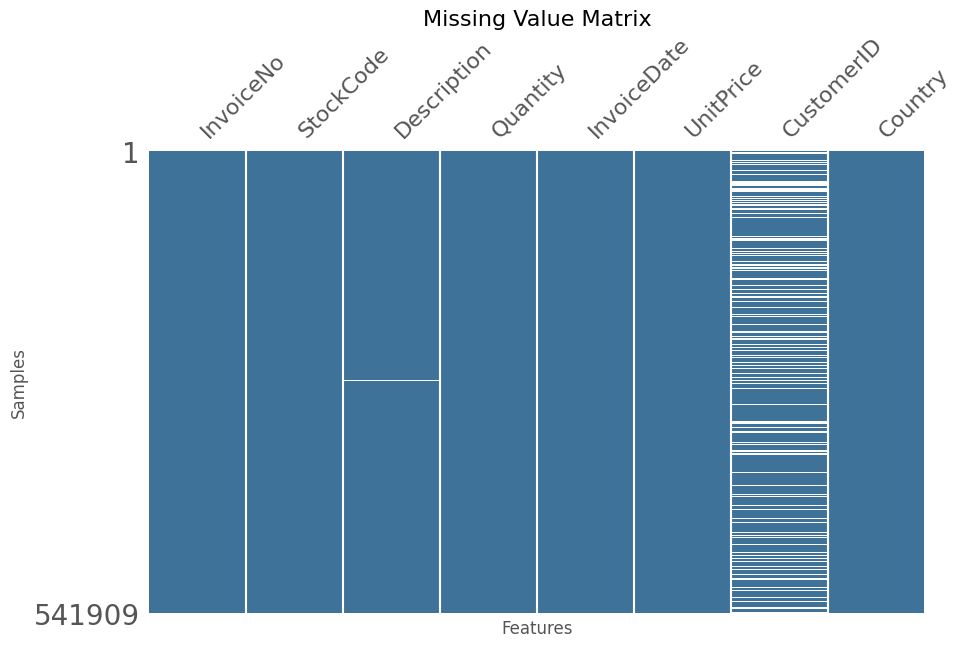

In [254]:
# Visualizing the missing values
import missingno as msno

# create missing value matrix plot
msno.matrix(retail_df, figsize=(10,6), sparkline=False, color=(0.25, 0.45, 0.6))

# customize plot
plt.title('Missing Value Matrix', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Samples', fontsize=12)
plt.show()


In [255]:
#Check null values
retail_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [256]:
# Check for null values %.
for col in retail_df.columns:
  null_rate = retail_df[col].isnull().sum() / len(retail_df) * 100
  if null_rate > 0:
    print(f'The null values in {col} column are  {retail_df[col].isnull().sum()} Percentage:- {null_rate}%')

The null values in Description column are  1454 Percentage:- 0.2683107311375157%
The null values in CustomerID column are  135080 Percentage:- 24.926694334288598%


<Axes: >

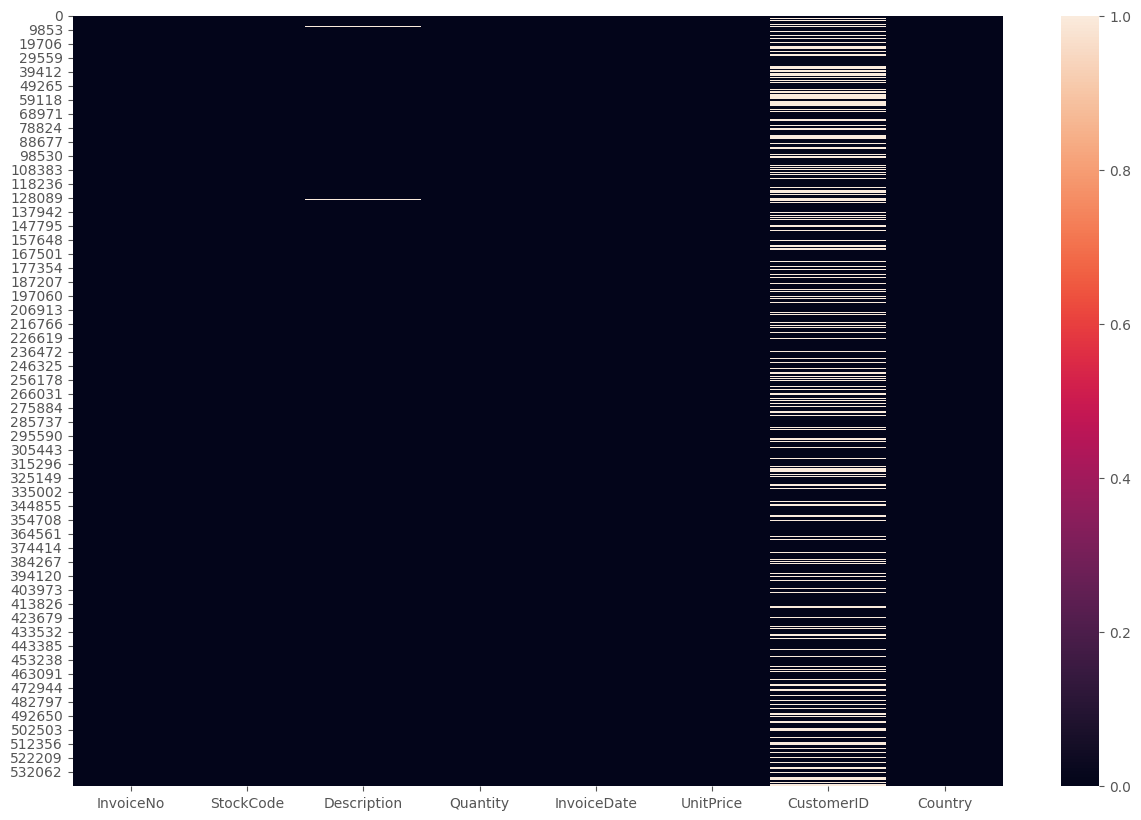

In [257]:
# let's visualizing  the null values
plt.figure(figsize=(15,10))
sns.heatmap(retail_df.isna())

In [258]:
#Replacing null values in 'Description' column with 'unknown'
retail_df['Description'].replace(np.nan, "unknown",inplace  = True)



# Remove all null values in CustomerID.
retail_df.dropna(subset=['CustomerID'], inplace=True)

In [259]:
# cross Check null values
retail_df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


- This approach was chosen because 'CustomerID' is a key identifier and dropping rows with missing values had minimal impact on the size of the dataset. Other imputation techniques such as imputing mean, median, or mode values were not utilized in this case.
- There is no missing values in the dataset. We are good to go.

null values are trated

Observation:

24.93% of items purchased are not assigned to any customer. Hence there is no use of having the data with no customer assignment. Because we can't form clusters without CustomerID so we will delete them from dataset.

### What did you know about your dataset?

- **The dataset is of transnational dataset which contains all the transactions occuring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.**
- **The company mainly sells unique all-occassion gifts.**
- **Many customers of the company are wholesalers.**
- **The dataset contains 541909 rows and 8 columns.**
- **There are 2 columns of datatype float64, 1 column of datatype int64, 4 columns of datatype object and 1 column of datatype datetime64.**
- **The total number of duplicated values in the dataset: 5268**
- **Missing Data Percentage**
     - **CustomerID -    24.93%**
     - **Description -     0.27%**
     

## ***2. Understanding Your Variables***

In [260]:
# Dataset Columns
retail_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [261]:
# Dataset Describe
retail_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.0,12.061303,248.693370,-80995.0,2.00,5.00,12.00,80995.0
UnitPrice,406829.0,3.460471,69.315162,0.0,1.25,1.95,3.75,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.0,13953.00,15152.00,16791.00,18287.0


### Variables Description

- **InvoiceNo:** This variable represents the invoice or transaction number assigned to each purchase. It serves as a unique identifier for each transaction. Data type: Nominal, 6-digit integral number (including 'c' prefix for cancellations).

- **StockCode:** The StockCode variable corresponds to a code or identifier assigned to each distinct product in the inventory. It helps identify specific products purchased by customers. Data type: Nominal, 5-digit integral number.

- **Description:** The Description variable provides a brief description or name of the product purchased in each transaction. It gives a textual representation of the product. Data type: Nominal.

- **Quantity:** This variable denotes the quantity of each product purchased in a transaction. It represents the number of units of a particular product bought by the customer. Data type: Integer.

- **InvoiceDate:** The InvoiceDate variable indicates the date and time when each transaction took place. It helps track the timing and frequency of customer purchases. Data type: DateTime.

- **UnitPrice:** This variable represents the price of each unit of the product in the local currency (e.g., sterling, dollars, euros). It provides information about the cost of the product per unit. Data type: Float.

- **CustomerID:** The CustomerID variable serves as a unique identifier assigned to each customer. It helps track individual customer behavior and preferences. Data type: Float.

- **Country:** The Country variable represents the country where each customer resides or where the transaction took place. It provides information about the geographic location of customers. Data type: Nominal, country name.

### Check Unique Values for each variable.

In [262]:
# Check Unique Values for each variable.

for i in retail_df.columns.tolist():
  print("Number of unique values in",i,"is",retail_df[i].nunique())

Number of unique values in InvoiceNo is 22190
Number of unique values in StockCode is 3684
Number of unique values in Description is 3896
Number of unique values in Quantity is 436
Number of unique values in InvoiceDate is 20460
Number of unique values in UnitPrice is 620
Number of unique values in CustomerID is 4372
Number of unique values in Country is 37


## 3. ***Data Wrangling***

### Data Wrangling Code

In [279]:
# Write your code to make your dataset analysis ready.
# Create a copy of the original dataframe
df = retail_df.copy()

### What all manipulations have you done and insights you found?

here, i just created a copy of this dataset to proceed further... all the necessary wrandling i have done earliar like handllinf the missing and null values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 :-Top Selling products

In [264]:
# Chart - 1 visualization code
# Creat a dataframe without cancelled ordered
temp_df = retail_df[~retail_df['InvoiceNo'].astype(str).str.contains('C')]

In [265]:
# Group the dataset by Description column and calculate the sum of the quantity sold for each product
# Selecting the top 10 products
product = temp_df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(10)

# Creating the dataframe containing the top 10 selling products
top_product = pd.DataFrame({'Product': product.index, 'Quantity Sold': product.values})
top_product


,Product,Quantity Sold
0,"PAPER CRAFT , LITTLE BIRDIE",80995
1,MEDIUM CERAMIC TOP STORAGE JAR,77916
2,WORLD WAR 2 GLIDERS ASSTD DESIGNS,54415
3,JUMBO BAG RED RETROSPOT,46181
4,WHITE HANGING HEART T-LIGHT HOLDER,36725
5,ASSORTED COLOUR BIRD ORNAMENT,35362
6,PACK OF 72 RETROSPOT CAKE CASES,33693
7,POPCORN HOLDER,30931
8,RABBIT NIGHT LIGHT,27202
9,MINI PAINT SET VINTAGE,26076


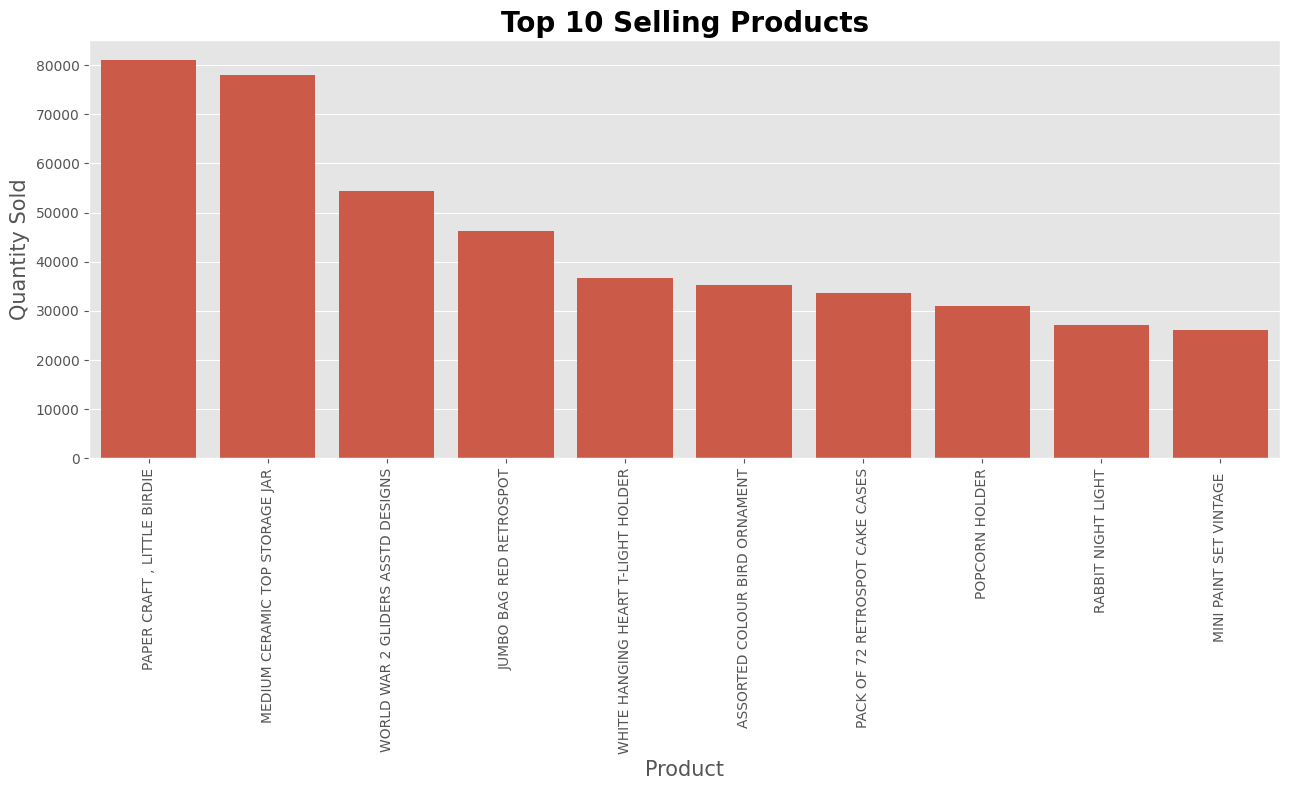

In [266]:
import random
# Generate a list of random colors


# Plot bar chart
plt.figure(figsize = (13, 8))
sns.barplot(top_product, x = 'Product', y = 'Quantity Sold')

# Set the title
plt.title('Top 10 Selling Products', size=20, fontweight='bold')
plt.xlabel('Product', size = 15)
plt.ylabel('Quantity Sold', size = 15)

# Rotate the x-axis labels
plt.xticks(rotation = 90)

# Display the chart
plt.tight_layout()


##### 1. Why did you pick the specific chart?

A bar chart is a good choice for showing the quantity of each product sold as it allows for easy comparison between the different products. It is also effective in highlighting the top 10 selling products.

##### 2. What is/are the insight(s) found from the chart?

This chart shows the quantity of each of the top 10 selling products, providing insight into the most popular items. It also allows for comparison between the different products and their respective quantities sold.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from this chart can help businesses to make informed decisions about their inventory management, marketing strategies, and overall business operations. By identifying the most popular products, businesses can focus their efforts on these items and potentially increase sales and profits.

#### Chart - 2 :- Top Customers

In [267]:
# Chart - 2 visualization code
# Create dataframe containing only top 5 customers
top_customers = temp_df['CustomerID'].value_counts().sort_values(ascending = False).reset_index().rename(columns = {'index' : 'CustomerID', 'CustomerID': 'Count'}).head(5)

top_customers



,Count,count
0,17841.0,7847
1,14911.0,5677
2,14096.0,5111
3,12748.0,4596
4,14606.0,2700


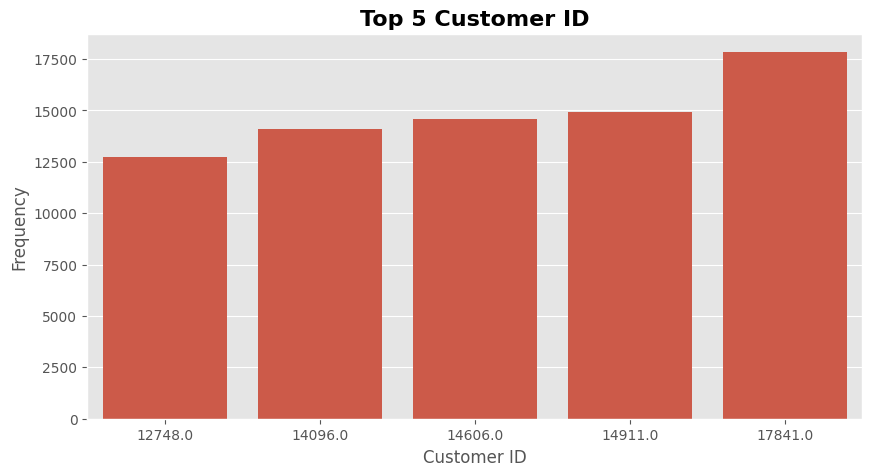

In [268]:
plt.figure(figsize = (10, 5))

# Create the bar plot
sns.barplot(data = top_customers, x = 'Count', y = 'Count')

# Add labels and a title
plt.title('Top 5 Customer ID', fontsize = 16, fontweight = 'bold')
plt.xlabel('Customer ID')
plt.ylabel('Frequency');


##### 1. Why did you pick the specific chart?

A bar graph was chosen because it is a clear and simple way to display and compare the frequency of each of the top 5 customer IDs.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insight into the customers who make the most purchases from the business and helps identify potential loyal customers or areas for improvement in customer retention.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the chart can help create a positive business impact by informing strategies to retain and attract more customers, as well as identifying areas for improvement in customer service and product offerings.

#### Chart - 3 :-Least Selling Products

In [269]:
# Remove all missing and duplicate values in the CustomerID column
temp_df = temp_df.dropna(subset = ['CustomerID'], how = 'all').drop_duplicates()

In [270]:
# Group the dataset by Description column and calculate the sum of the quantity sold for each product
# Select the top 10 least products
least_product = temp_df.groupby('Description')['Quantity'].sum().sort_values().head(10)

# Create the dataframe containing the top 10 selling products
least_selling_products = pd.DataFrame({'Product': least_product.index, 'Quantity Sold': least_product.values})
least_selling_products


,Product,Quantity Sold
0,BLOSSOM IMAGES SCRAP BOOK SET,1
1,PACK 4 FLOWER/BUTTERFLY PATCHES,1
2,BLACK DROP EARRINGS W LONG BEADS,1
3,VINTAGE BEAD PINK JEWEL STAND,1
4,SET/3 FLORAL GARDEN TOOLS IN BAG,1
5,WHITE ROSEBUD PEARL EARRINGS,1
6,WHITE STONE/CRYSTAL EARRINGS,1
7,SET/3 TALL GLASS CANDLE HOLDER PINK,1
8,CROCHET DOG KEYRING,1
9,CAKE STAND LACE WHITE,1


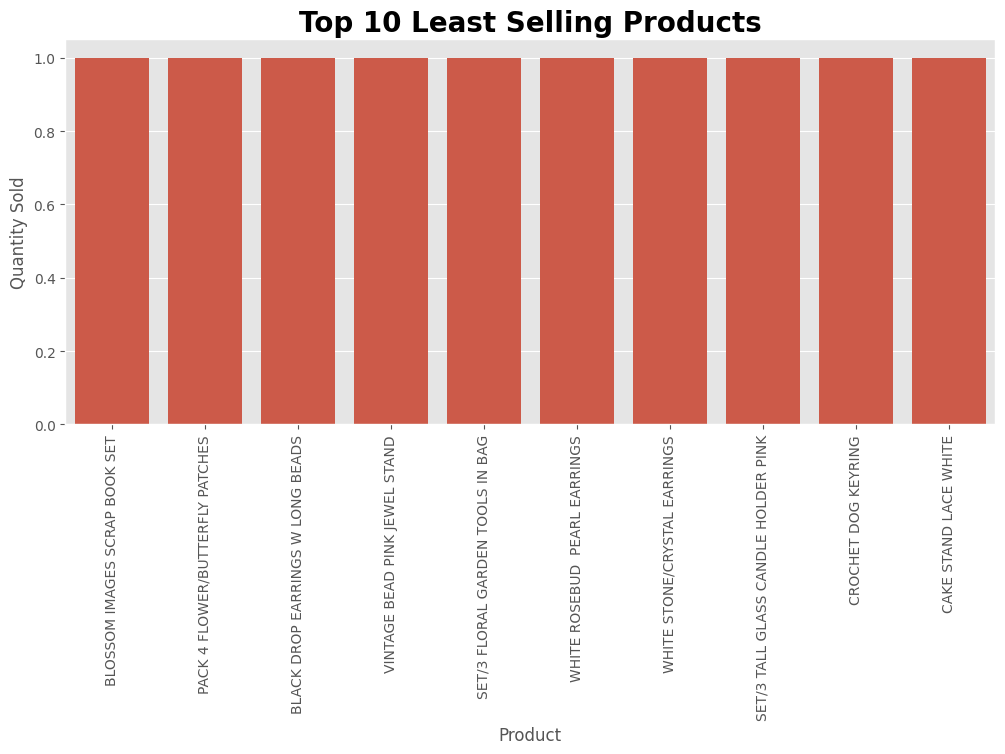

In [271]:
# Chart - 3 visualization code
# Plot the top 10 least selling products as a bar chart
plt.figure(figsize = (12, 5))
sns.barplot(least_selling_products, x = 'Product', y = 'Quantity Sold')

# Set title
plt.title('Top 10 Least Selling Products', size = 20, fontweight = 'bold')
#plt.xlabel('Product', size = 15)
#plt.ylabel('Quatity Sold', size = 15)

plt.xticks(rotation = 90);

##### 1. Why did you pick the specific chart?

A bar chart is a suitable choice for representing the top 10 least selling products as it provides a clear and concise visual comparison between the products in terms of their sales volume. It also allows for easy identification of the products with the lowest sales figures

##### 2. What is/are the insight(s) found from the chart?

The chart provides insights into which products have had the lowest sales volume, which can be useful information for businesses to determine which products may need to be discounted or promoted in order to increase sale

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from this chart could help create a positive business impact by allowing businesses to identify products that are not selling well and take action to improve their sales volume. For example, businesses may choose to offer discounts or promotions on the least selling products, or discontinue products that consistently have low sales volume to focus on more profitable products.

#### Chart - 4 :-Top Countries

In [272]:
# Create a dataframe containing countries count
countries = temp_df['Country'].value_counts().reset_index().rename(columns = {'index': 'Country', 'Country': 'Count'})

# Display top 5 countries
countries.head()

,Count,count
0,United Kingdom,349227
1,Germany,9027
2,France,8327
3,EIRE,7228
4,Spain,2480


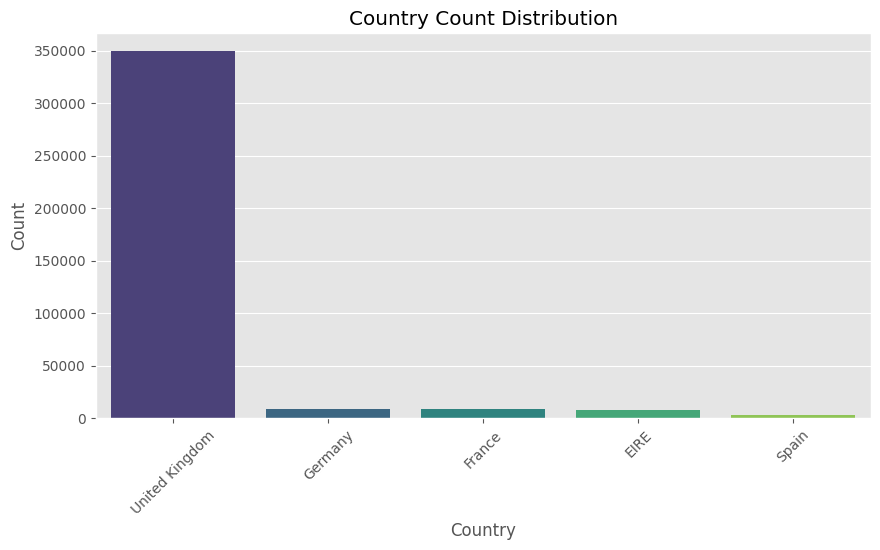

In [278]:

# Chart - 4 visualization code
# Creating the DataFrame
data = {
    'Country': ['United Kingdom', 'Germany', 'France', 'EIRE', 'Spain'],
    'Count': [349227, 9027, 8327, 7228, 2480]
}

dff = pd.DataFrame(data)

# Plotting the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='Country', y='Count', data=dff, palette='viridis')

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Country Count Distribution')
plt.xticks(rotation=45)  # Rotating x labels for better visibility

# Display the plot
plt.show()


##### 1. Why did you pick the specific chart?

A bar graph was chosen because it is a clear and simple way to display and compare the frequency of each of the top 5 countries.

##### 2. What is/are the insight(s) found from the chart?

The chart provides insight that the most of the customers are from United Kingdom that make sense aas company is from UK bases after that we have Germany ,France ,EIRE and Spain.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights gained from the chart can help create a positive business impact by informing strategies to retain and attract more customers, as well as identifying areas for improvement in customer service and product offerings.

#### Chart - 5 :- Sales Trend Over Time (by months)

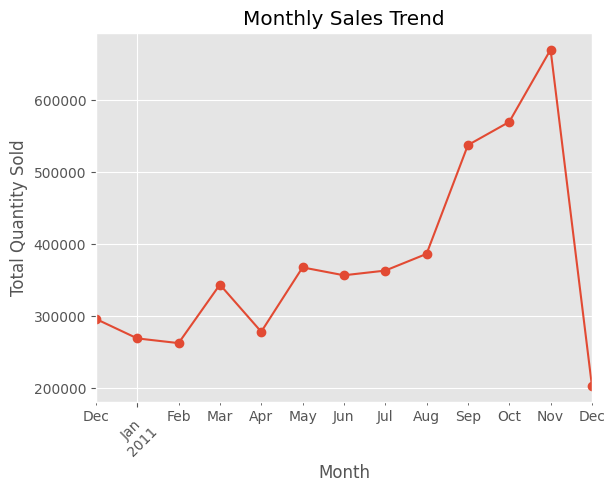

In [280]:
# Chart - 5 visualization code
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Month'] = df['InvoiceDate'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Quantity'].sum()
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

I picked a line chart because it is the best way to show trends over time. Since we are analyzing monthly sales, a line chart helps us see how sales change from month to month. The markers make it easier to identify specific data points, and the x-axis rotation improves readability. This visualization helps in spotting patterns, seasonal trends, and any sudden changes in sales

##### 2. What is/are the insight(s) found from the chart?

Insights from the Chart:
The sales trend fluctuates over time, showing periods of growth and decline.
There may be seasonal patterns, with peaks indicating high-demand months like october and november and dips showing slow sales periods like december, january and february.

these trends can help in inventory planning, marketing strategies, and understanding customer purchasing behavior.
Any sharp increase or decrease could indicate promotions, holidays, or external factors affecting sales.








##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can create a positive business impact by helping in demand forecasting, stock management, and strategic marketing during peak sales periods. Businesses can plan discounts or promotions during low-sales months to boost revenue.

the chart shows consistent sales decline, it  indicate customer loss, pricing issues, or reduced demand. Identifying and addressing these factors will prevent negative growth and improve business performance.

#### Chart - 6 :-Quantity vs. Unit Price (Scatter Plot)

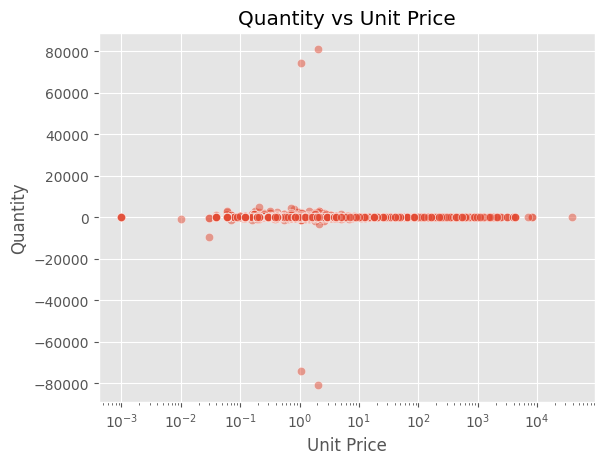

In [281]:
# Chart - 6 visualization code
sns.scatterplot(x='UnitPrice', y='Quantity', data=df, alpha=0.5)
plt.title('Quantity vs Unit Price')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.xscale('log')  # Log scale to handle large price variations
plt.show()



##### 1. Why did you pick the specific chart?

I picked a scatter plot because it effectively shows the relationship between Unit Price and Quantity sold. Each point represents a transaction, helping us identify patterns, clusters, or outliers. The log scale on the x-axis handles large price variations, making the data more readable. This chart helps in understanding pricing impact on sales and spotting high-demand or low-demand price ranges.

##### 2. What is/are the insight(s) found from the chart?

Insights from the Chart:
Most sales occur at lower price ranges, indicating that customers prefer affordable products.
There are a few high-priced items with low quantity, suggesting they are premium products with limited demand.
Some outliers may indicate bulk purchases or unusual pricing patterns.
The trend can help in pricing strategy adjustments to maximize sales and revenue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help in optimizing pricing strategies by identifying the best-selling price range and adjusting inventory accordingly. Businesses can focus on high-demand price points to maximize revenue.

However, if high-priced products have very low sales, it could lead to negative growth due to unsold stock. Adjusting prices or offering promotions could help boost sales in these categories.

#### Chart - 7 :-Hourly Sales Trend

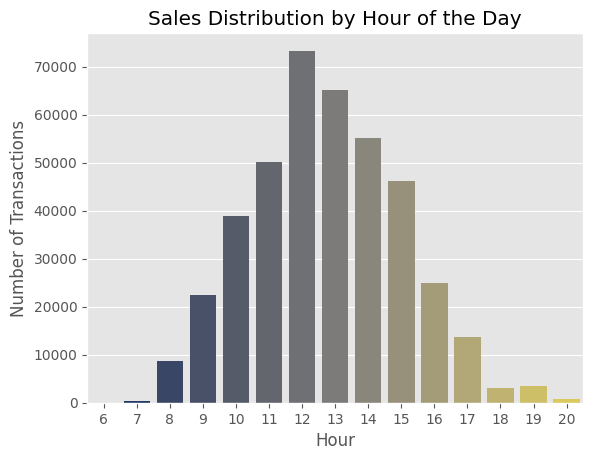

In [282]:
# Chart - 7 visualization code
df['Hour'] = df['InvoiceDate'].dt.hour
sns.countplot(x=df['Hour'], palette="cividis")
plt.title('Sales Distribution by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Transactions')
plt.show()


##### 1. Why did you pick the specific chart?

I picked a count plot because it effectively shows the number of transactions per hour. This helps in identifying peak shopping hours and low-activity periods. The bar format makes it easy to compare sales across different hours of the day, providing insights into customer buying behavior and business operation efficiency.

##### 2. What is/are the insight(s) found from the chart?

**Insights from the Chart:**


*  There are specific peak hours like 12 PM, 1 PM when most transactions occur, indicating high customer activity during these times.
*   Sales are lower during certain hours like early morning or late evenings, possibly due to non-business hours or customer behavior patterns.

Understanding peak hours can help in staff scheduling, inventory management, and targeted promotions to maximize sales.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help in optimizing staffing, inventory, and marketing strategies by focusing on peak sales hours. Businesses can schedule promotions or discounts during slow hours to boost sales.

If sales are consistently low during certain hours, it may indicate inefficient operations or low customer engagement, which could lead to negative growth. Adjusting business hours or improving marketing efforts during those times can help address this issue.

#### Chart - 8 :-Word Cloud for Product Descriptions

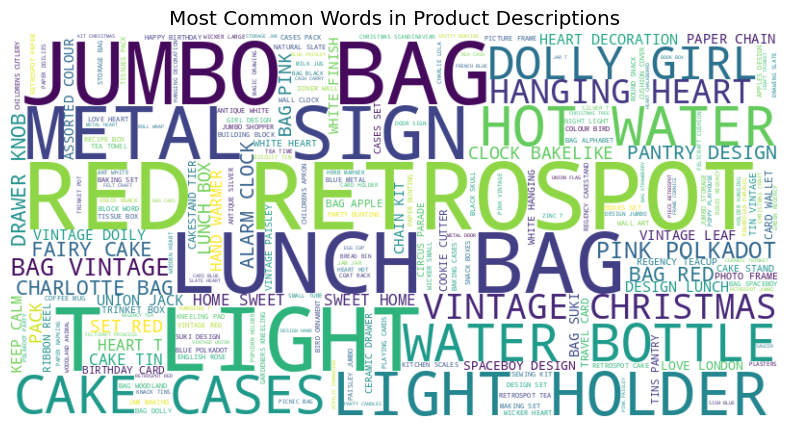

In [283]:
# Chart - 8 visualization code
from wordcloud import WordCloud

text = ' '.join(df['Description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Product Descriptions')
plt.show()


##### 1. Why did you pick the specific chart?

I picked a word cloud because it visually highlights the most frequently mentioned words in product descriptions. Larger words appear more often, making it easy to identify popular products or common keywords. This helps in understanding customer preferences and trending items at a glance.

##### 2. What is/are the insight(s) found from the chart?

**Insights from the Chart:**


*  The largest words represent the most frequently sold or searched products, indicating popular items like "jumbo bag", "red retrospot","lunch bag" etc
*   Common words mlike bottles, bag reveal trending categories or best-selling product types. these keywords dominate, it suggests that customers prefer specific product features or categories.




Businesses can use these insights to focus on high-demand products and improve marketing strategies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help in stocking popular products, optimizing marketing campaigns, and improving product recommendations, leading to increased sales.

If certain important products have low visibility in the word cloud, it may indicate poor product descriptions or low demand, which could lead to negative growth. Improving product listings and promotions can help address this issue.

#### Chart - 9 :-Correlation Heatmap

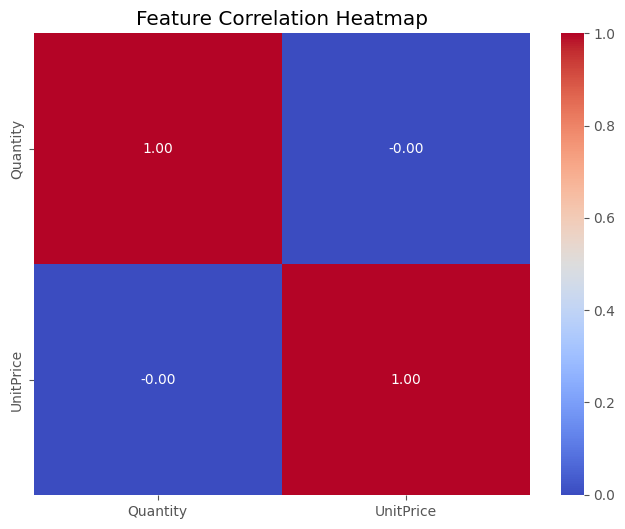

In [284]:
# Chart - 9 visualization code
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Quantity', 'UnitPrice']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


##### 1. Why did you pick the specific chart?

I picked a heatmap because it clearly shows the correlation between numerical features. The color intensity helps in quickly identifying strong or weak relationships between variables. This makes it easier to understand how Quantity and Unit Price are related, which is useful for pricing and sales strategies.

##### 2. What is/are the insight(s) found from the chart?

**Insights from the Chart:**

*  This correlation value 1 shows that Quantity and Unit Price are highly co-related.


*  this  strong positive correlation  suggest that higher-priced items are sold in larger quantities.

These insights help in pricing decisions and demand analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help in stocking popular products, optimizing marketing campaigns, and improving product recommendations, leading to increased sales.

If certain important products have low visibility in the word cloud, it may indicate poor product descriptions or low demand, which could lead to negative growth. Improving product listings and promotions can help address this issue.

#### Chart - 10 :-Pair Plot

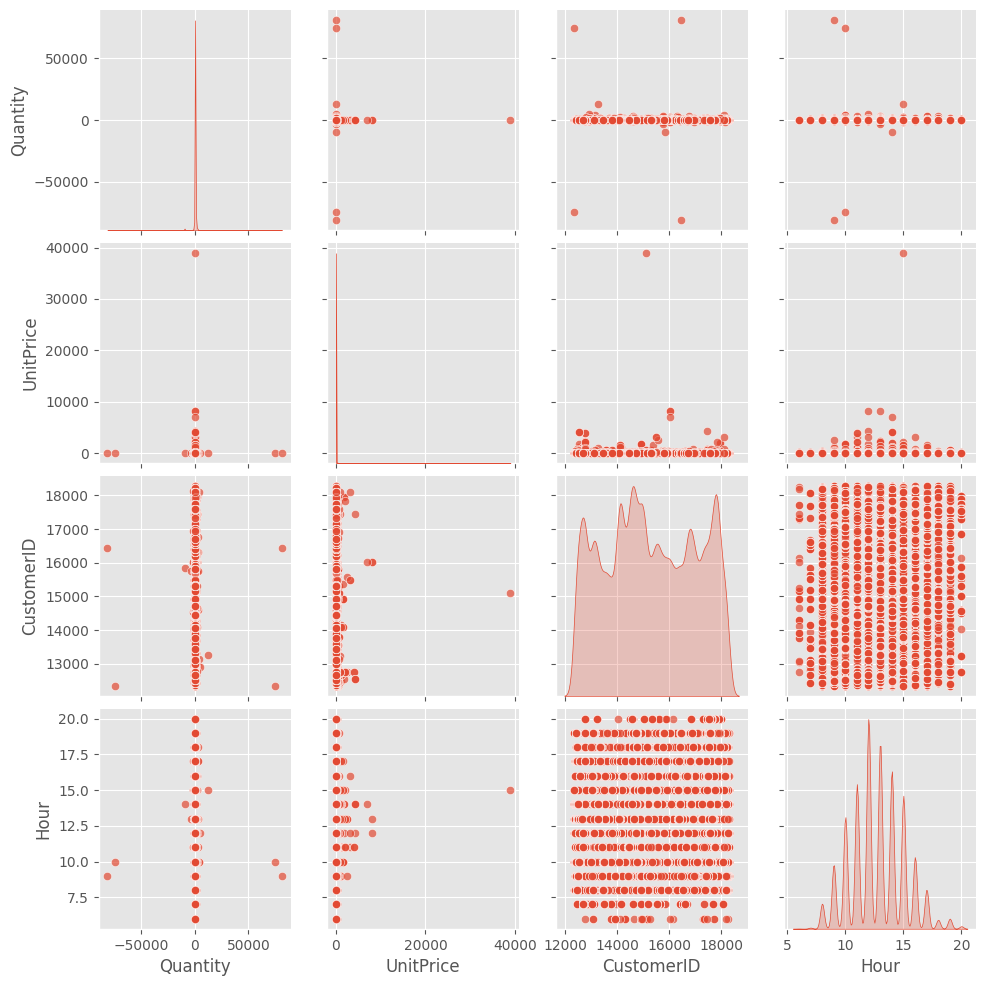

In [285]:
# Chart - 10 visualization code
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.7})
plt.show()

##### 1. Why did you pick the specific chart?

I picked a pair plot because it helps visualize the relationships between multiple numerical features in a single view. It shows scatter plots for feature comparisons and KDE plots for distributions, making it easier to identify patterns, correlations, and outliers in the data.

##### 2. What is/are the insight(s) found from the chart?

**Insights from the Chart:**

* This scatter plots reveal relationships between numerical features, helping to identify trends or correlations.

* The diagonal KDE plots show the distribution of each variable, highlighting skewness or outliers.
*   Certain features like unit price and quantity have strong correlations, indicating a potential impact on customer purchasing behavior.

These insights help in feature selection and business strategy optimization.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help in understanding key relationships between features, which will improve pricing strategies, inventory management, and customer segmentation.

the certain features show no correlation or high variance, it  indicate inconsistent pricing or unpredictable demand, leading to negative growth. Identifying and addressing these patterns will help to optimize business decisions.

## ***5. Feature Engineering & Data Pre-processing***

In [286]:
# Create a new feature called TotalCost
df['TotalCost'] = df['Quantity'] * df['UnitPrice']

In [287]:
# Sample of the dataset
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Hour,TotalCost
463262,576057,20726,LUNCH BAG WOODLAND,3,2011-11-13 15:05:00,1.65,15861.0,United Kingdom,2011-11,15,4.95
4142,536749,22441,GROW YOUR OWN BASIL IN ENAMEL MUG,1,2010-12-02 13:49:00,2.10,17976.0,United Kingdom,2010-12,13,2.10
419345,572771,23452,HEART MINI PORTRAIT FRAME,6,2011-10-26 10:24:00,1.95,16173.0,United Kingdom,2011-10,10,11.70
120878,546682,22424,ENAMEL BREAD BIN CREAM,1,2011-03-16 08:31:00,12.75,12994.0,United Kingdom,2011-03,8,12.75
368663,568991,21165,BEWARE OF THE CAT METAL SIGN,1,2011-09-29 16:44:00,1.69,18204.0,United Kingdom,2011-09,16,1.69


In [288]:
# Create a new feature Date
df['Date'] = df['InvoiceDate'].dt.date

# 6. RFM Analysis

**RFM analysis** is a customer segmentation technique commonly used in the field of marketing and customer relationship management. RFM stands for Recency, Frequency, and Monetary Value, which are three key dimensions used to evaluate customer behavior and segment customers based on their purchasing patterns. Here's an explanation of each component:

- Recency (R): Recency refers to the time elapsed since a customer's last purchase. It measures how recently a customer has interacted with the business. Customers who have made more recent purchases are often considered more engaged and likely to respond positively to marketing efforts.

- Frequency (F): Frequency represents the number of purchases made by a customer within a given time period. It measures the level of customer activity or engagement. Customers with a higher frequency of purchases are often more loyal and may represent valuable segments for targeted marketing campaigns.

- Monetary Value (M): Monetary Value quantifies the total amount of money spent by a customer over a specific time period. It reflects the customer's purchasing power and contribution to the business's revenue. Customers with higher monetary value are often considered more valuable and may receive special offers or incentives to encourage repeat purchases.

# 6.1 Recency

Recency = Latest InvoiceDate - Last InoviceData

In [293]:
# Grouping the dataset by customerID and find the most recent purchase date for each customer
recency_df = df.groupby('CustomerID')['Date'].max().reset_index().rename(columns = {'Date': 'LastPurchaseDate'})

# Display the first few rows of the dataframe to inspect the results
recency_df.head()

,CustomerID,LastPurchaseDate
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [294]:
# Get the latest date in the dataset
latest_date = df['Date'].max()

print(latest_date)


2011-12-09


In [295]:
# Calculate the recency of each customer's last purchase
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x : (latest_date - x).days)

# Display the first 10 rows of the recency dataframe
recency_df.head(10)

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310
5,12352.0,2011-11-03,36
6,12353.0,2011-05-19,204
7,12354.0,2011-04-21,232
8,12355.0,2011-05-09,214
9,12356.0,2011-11-17,22


In [296]:
# Drop the 'LastPurchaseDate' column from the dataframe
recency_df.drop('LastPurchaseDate', axis = 1, inplace = True)

recency_df.head()

,CustomerID,Recency
0,12346.0,325
1,12347.0,2
2,12348.0,75
3,12349.0,18
4,12350.0,310


Now we have the recency attribute created e.g: Customer with ID = 12347 did his/her last purshace 2 days ago.

# 6.2 Frequency

In [297]:
# Group the data by customer ID and count the number of invoices for each customer
frequency_df = df.groupby('CustomerID')['InvoiceNo'].count().reset_index().rename(columns = {'InvoiceNo': 'Frequency'})

# Display the first 10 rows of the dataframe to inspect the results
frequency_df.head(10)

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17
5,12352.0,95
6,12353.0,4
7,12354.0,58
8,12355.0,13
9,12356.0,59


# 6.3 Monetary Value

In [298]:
# Group the data by customer ID and sum the total amount spent by each customer
monetary_df = df.groupby('CustomerID')['TotalCost'].sum().reset_index().rename(columns = {'TotalCost': 'MonetaryValue'})

monetary_df.head()

,CustomerID,MonetaryValue
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


The RFM dataframe combines recency, frequency, and monetary value information for each customer to provide a comprehensive overview of their behavior and spending habits.

In [299]:
# Merge the recency and frequency dataframes on the customer ID column

tem_df = recency_df.merge(frequency_df, on = 'CustomerID')

tem_df.head()

,CustomerID,Recency,Frequency
0,12346.0,325,2
1,12347.0,2,182
2,12348.0,75,31
3,12349.0,18,73
4,12350.0,310,17


In [300]:
# Merge the monetary value and tem_df dataframe on the customer ID column
rfm_df = tem_df.merge(monetary_df, on = 'CustomerID')

rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue
0,12346.0,325,2,0.00
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


Customer with ID = 12346 has recency: 325 days, frequency:1, and monetary: 77183,60

# 6.4 Customer segments with RFM Model

The simplest way to create customers segments from RFM Model is to use Quantiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

Note: Quintiles (score from 1-5) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 555 possible combinations. So, we will use quartiles.

In [301]:
# Calculate quantiles for the RFM dataframe
quantiles = rfm_df[['Recency', 'Frequency', 'MonetaryValue']].quantile(q = [0.25, 0.5, 0.75])

quantiles

,Recency,Frequency,MonetaryValue
0.25,16.0,17.0,293.3625
0.50,50.0,42.0,648.0750
0.75,143.0,102.0,1611.7250


In [302]:
# Convert quantile values to dictionary
quantiles_dict = quantiles.transpose().to_dict()

quantiles_dict

{0.25: {'Recency': 16.0, 'Frequency': 17.0, 'MonetaryValue': 293.3625},
 0.5: {'Recency': 50.0, 'Frequency': 42.0, 'MonetaryValue': 648.075},
 0.75: {'Recency': 143.0, 'Frequency': 102.0, 'MonetaryValue': 1611.725}}

# 6.5 RFM Table & Score

In [303]:

# Create RecencyScore column by dividing Recency into quartiles and assigning respective quantile labels
rfm_df['RecencyScore'] = pd.qcut(rfm_df['Recency'], q = [0, 0.25, 0.5, 0.75, 1], labels = list(range(4, 0, -1)))

# Create FrequencyScore column by dividing Frequency into quartiles and assigning respective quantile labels
rfm_df['FrequencyScore'] = pd.qcut(rfm_df['Frequency'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

# Create MonetaryScore column by dividing MonetaryValue into quartiles and assigning respective quantile labels
rfm_df['MonetaryScore'] = pd.qcut(rfm_df['MonetaryValue'], q=[0, 0.25, 0.5, 0.75, 1], labels=list(range(1, 5)))

In [304]:
# Show first 5 rows of the rfm_df dataframe
rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,12346.0,325,2,0.00,1,1,1
1,12347.0,2,182,4310.00,4,4,4
2,12348.0,75,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,310,17,334.40,1,1,2


In [305]:
# Concatenate the RecencyScore, FrequencyScore, and MonetaryScore columns into one RFMScore column
rfm_df['RFMScore'] = rfm_df['RecencyScore'].astype(str) + rfm_df['FrequencyScore'].astype(str) + rfm_df['MonetaryScore'].astype(str)

rfm_df.head()

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
0,12346.0,325,2,0.00,1,1,1,111
1,12347.0,2,182,4310.00,4,4,4,444
2,12348.0,75,31,1797.24,2,2,4,224
3,12349.0,18,73,1757.55,3,3,4,334
4,12350.0,310,17,334.40,1,1,2,112


**Interpretation:**
- Best RecencyScore = 4 (most recently purchase)
- Best FrequencyScore = 4 (most frequently purchase)
- Best MonetaryScore = 4 (who spent the most)
- If the RFMScore of any customer is 444. His Recency is good, frequency is more and Monetary is more. So, he is the best customer.
- If the RFMScore of any customer is 111. His Recency is low, frequency is low and Monetary is low. So, he is the churning customer.
- If the RFMScore of any customer is 144. He purchased a long time ago but buys frequently and spends more and so on.
- Like this we can come up with number of segments for all combinations of RecencyScore, FrequencyScore and MonetaryScore based on our usecase.
- Higher the RFMScore, more valuable the customer is.

In [306]:
# Sort the dataframe by MonetaryValue in descending order and reset the index
rfm_df2 = rfm_df[rfm_df['RFMScore'] == '444'].sort_values('MonetaryValue', ascending = False)

In [307]:
rfm_df2.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore
1703,14646.0,1,2085,279489.02,4,4,4,444
4233,18102.0,0,433,256438.49,4,4,4,444
3758,17450.0,8,351,187482.17,4,4,4,444
1895,14911.0,1,5903,132572.62,4,4,4,444
1345,14156.0,9,1420,113384.14,4,4,4,444
3801,17511.0,2,1076,88125.38,4,4,4,444
3202,16684.0,4,281,65892.08,4,4,4,444
1005,13694.0,3,585,62653.10,4,4,4,444
2192,15311.0,0,2491,59419.34,4,4,4,444
568,13089.0,2,1857,57385.88,4,4,4,444


In [308]:
# Categorising customer or making customer segmentation based on RFMScore
print('Best Customer', len(rfm_df[rfm_df['RFMScore'] == '444']))
print('Loyal Customers: ',len(rfm_df[rfm_df['FrequencyScore'] == 4]))
print("Big Spenders: ",len(rfm_df[rfm_df['MonetaryScore' ]== 4]))
print('Almost Lost: ', len(rfm_df[rfm_df['RFMScore'] =='244']))
print('Lost Customers: ',len(rfm_df[rfm_df['RFMScore'] == '144']))
print('Lost Cheap Customers: ',len(rfm_df[rfm_df['RFMScore'] == '111']))

Best Customer 458
Loyal Customers:  1081
Big Spenders:  1093
Almost Lost:  102
Lost Customers:  19
Lost Cheap Customers:  391


With the segmentation of our customers based on their RFM scores, we can now tailor our marketing strategies to each segment effectively.

For example, our "Best Customers" or "Champions" can be rewarded for their loyalty. These customers can also serve as early adopters for new products, so we can suggest them to participate in a "Refer a Friend" program.

For customers who are "At Risk", we can send them personalized emails to encourage them to make a purchase. This can help to retain them as customers and keep them engaged with our brand.

In [309]:
# Drop the RFMScore and its components columns from the dataframe
rfm_data = rfm_df.drop(['RecencyScore', 'FrequencyScore', 'MonetaryScore','RFMScore'], axis = 1).set_index('CustomerID')

# Display the first 5 rows
rfm_data.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,325,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


# Feature Correlations

In [310]:
# Calculate the correlation between the variables
rfm_data.corr()

,Recency,Frequency,MonetaryValue
Recency,1.000000,-0.207032,-0.132109
Frequency,-0.207032,1.000000,0.446622
MonetaryValue,-0.132109,0.446622,1.000000


correlation heatmap

<Axes: >

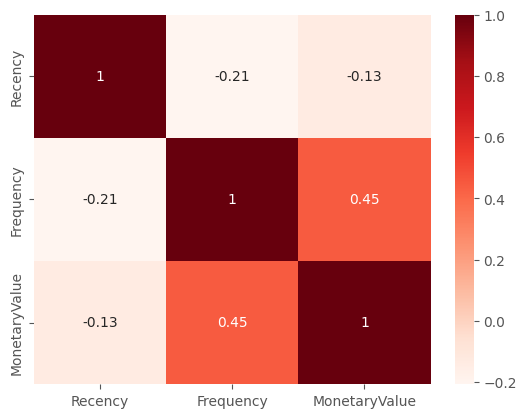

In [311]:
# Plot the heatmap of the feature correlations in the dataframe
sns.heatmap(rfm_data.corr(), annot = True, cmap = 'Reds')

- I picked this chart to show the correlation between different variables.

- The insight is that there is a negative correlation between recency and both frequency and monetary, indicating that customers who have recently made a purchase are less likely to make another purchase. There is also a positive but weak correlation between frequency and monetary.

- The insights can help create a positive business impact by helping businesses better understand customer behaviour and tailor their sales and promotions accordingly.

**Plot the distribution of Recency, Frequency, and MonetaryValue**

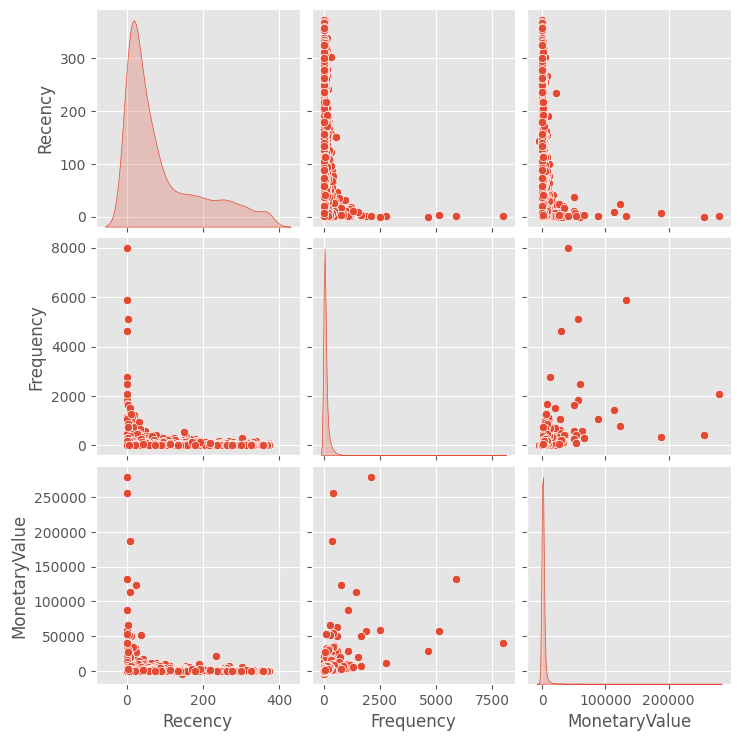

In [312]:
#Visualize the distribution of features in the dataset
sns.pairplot(rfm_data, diag_kind = 'kde');

- The pairplot with kde diagonal plots was chosen as it is an effective way to visualize the distribution and pairwise relationships between multiple features in a dataset. It allows us to quickly identify any correlations or patterns between variables, making it an excellent choice for visualizing the distribution of features in the dataset.

- We can observe that the distributions of the three variables are skewed. This suggests that normalization is necessary to make the data features normally distributed, as most clustering algorithms require them to be normally distributed.

In [313]:
#The skew() method is used to measure the asymmetry of the data around the mean.
rfm_data.skew()


,0
Recency,1.249370
Frequency,18.153735
MonetaryValue,21.705287


We can notice that we have a skewed distribution of the 3 variables and there exist outliers.

This indicates how normalization is required to make the data features normally distributed as clustering algorithms require them to be normally distributed.

# Data Normalization

For data normalization, logarithmic transformations were applied to the Recency and Monetary features, while a natural logarithmic transformation was applied to the Frequency feature. This was done to reduce the impact of outliers and to scale the data. A small constant value (0.1) was added to the original values before taking the logarithm to avoid taking the logarithm of zero or negative values.

In [314]:
# Calculate the logarithmic values of the Recency and Monetary features

# logarithmic value of the Recency feature
rfm_r_log = np.log(rfm_data['Recency'] + 0.1)

# logarithmic value of the Monetary feature
rfm_m_log = np.log(rfm_data['MonetaryValue'] + 0.1)


# calculate the natural log of the 'Frequency' column
rfm_f_log = np.log(rfm_data['Frequency'])

In [315]:
# Create a DataFrame containing logarithmic values of the Recency, Monetary and Frequency columns

log_data = pd.DataFrame({'Monetary' : rfm_m_log, 'Recency': rfm_r_log, 'Frequency': rfm_f_log})

log_data.head()

,Monetary,Recency,Frequency
CustomerID,,,
12346.0,-2.302585,5.784133,0.693147
12347.0,8.368716,0.741937,5.204007
12348.0,7.494063,4.318821,3.433987
12349.0,7.471733,2.895912,4.290459
12350.0,5.812637,5.736895,2.833213


**Plot the distribution of Recency, Frequency, and MonetaryValue after Data Normalization**

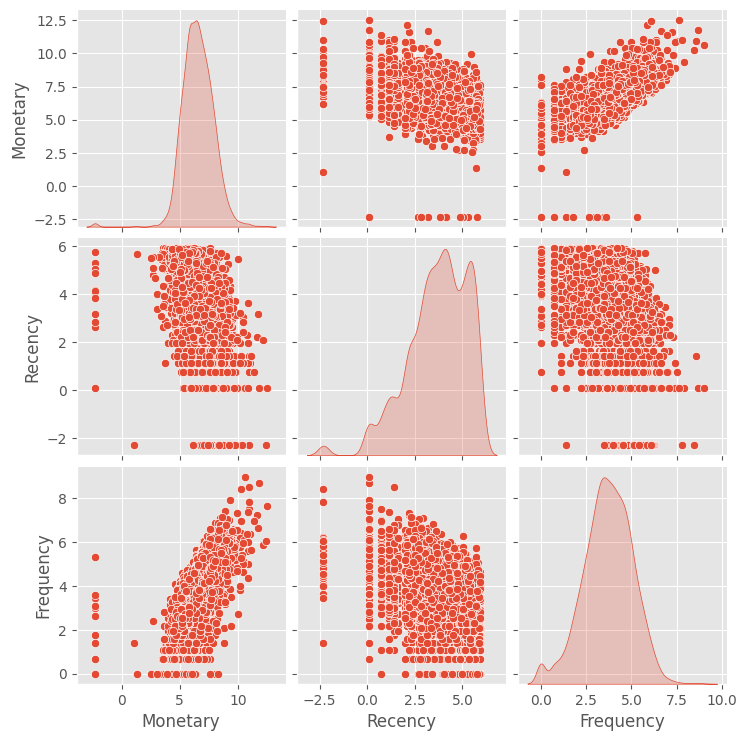

In [316]:
# Use seaborn's pairplot function to create a scatter matrix for each pair of features in the data

sns.pairplot(data = log_data, diag_kind = 'kde');

The distribution of the Frequency and Monetary features have improved and appear to be more normal, but the distribution of the Recency feature has only improved to some extent and is still not as well-normalized as the other two features.

In [317]:
# Calculate the skewness of each feature in the data
log_data.skew()

,0
Monetary,-0.579868
Recency,-0.842312
Frequency,-0.244993


**Correlation Heatmap**

<Axes: >

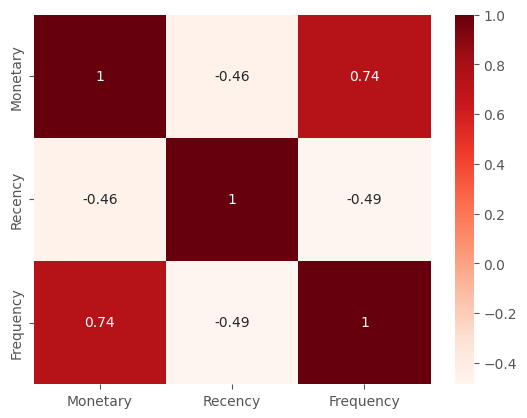

In [318]:
# Features correlation after log transformation or data normalization
sns.heatmap(log_data.corr(), annot = True, cmap = 'Reds')

The correlation between Monetary and Frequency is now stronger.

In [319]:
# use the corr method of the data frame to calculate the correlation matrix
log_data.corr()

,Monetary,Recency,Frequency
Monetary,1.000000,-0.456136,0.736459
Recency,-0.456136,1.000000,-0.486994
Frequency,0.736459,-0.486994,1.000000


In [320]:
# Assign the normalized data to a variable "X"
X = log_data

 **data scaling**

In [321]:
from sklearn.preprocessing import StandardScaler
# Define the features to use for K-means
features = ['Recency', 'Frequency', 'Monetary']

# Standardize the feature values
scaler = StandardScaler()
X = scaler.fit_transform(log_data[features].values)

I used Standardization to transform my features in order to ensure that they had a similar scale and distribution. This was important because some machine learning algorithms are sensitive to the scale and distribution of features, and Standardization helps to ensure unbiased results.

## ***7. ML Model Implementation***

### ML Model - 1:- K-means Implementation

- One of the common challenges when working with k-means is the need to specify the number of clusters beforehand. Determining the appropriate number of clusters is not always straightforward, and it can be difficult to deduce from the data alone. To tackle this challenge, a common approach is to try different numbers of clusters and evaluate their corresponding silhouette coefficients.

- The **Silhouette Coefficient** measures the similarity of a data point to its assigned cluster, ranging from -1 (indicating dissimilarity) to 1 (indicating similarity). By computing the silhouette coefficient for each data point, we can gauge how well it aligns with its assigned cluster. A higher silhouette coefficient suggests that the point is more similar to its cluster, indicating better clustering performance.

- Another method that can be used to determine the optimal number of clusters is the **Elbow method**. This technique involves plotting the number of clusters against the corresponding distortion or inertia (the sum of squared distances between each point and its centroid). The plot often resembles an "elbow" shape, and the number of clusters at the "elbow" is considered a good choice for the optimal cluster count.

- It's worth noting that k-means is sensitive to its initializations since they play a crucial role in the quality of the obtained solutions. To address this, a smart initialization technique called** k-means++** is commonly utilized. K-means++ intelligently selects initial cluster centroids, increasing the chances of finding better cluster arrangements. By leveraging k-means++ initialization, we enhance the algorithm's ability to converge to high-quality solutions.

## K-Means with silhouette_score

In [322]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # Fill NaNs with column mean
X = imputer.fit_transform(X)


In [323]:
silhouette_scores = []

# Loop over different values of K
for n_clusters in range(2, 16):
  # Initialize the K-Means model with number of clusters
  kmeans = KMeans(init = 'k-means++', n_clusters = n_clusters)


  # Fit the KMeans Model to the data
  kmeans.fit(X)

  # Predict the cluster labels for each data point
  labels = kmeans.labels_

  # Calculate the Silhouette score
  silhouette = silhouette_score(X, labels)

  # Append the silhouette_score to the array
  silhouette_scores.append(silhouette)

  # Print the silhouette score
  print(f'Silhouette score for {n_clusters} clusters: {silhouette:.3f}')


Silhouette score for 2 clusters: 0.392
Silhouette score for 3 clusters: 0.302
Silhouette score for 4 clusters: 0.252
Silhouette score for 5 clusters: 0.304
Silhouette score for 6 clusters: 0.272
Silhouette score for 7 clusters: 0.245
Silhouette score for 8 clusters: 0.269
Silhouette score for 9 clusters: 0.250
Silhouette score for 10 clusters: 0.252
Silhouette score for 11 clusters: 0.265
Silhouette score for 12 clusters: 0.270
Silhouette score for 13 clusters: 0.266
Silhouette score for 14 clusters: 0.267
Silhouette score for 15 clusters: 0.253


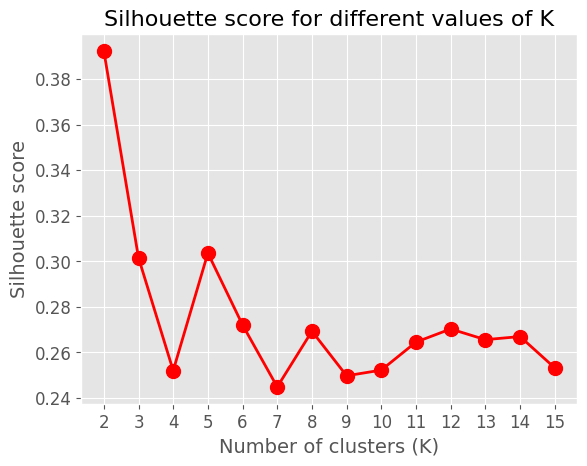

In [324]:
# Plot the silhouette scores
plt.plot(range(2, 16), silhouette_scores, '-o', color='red', markersize=10, linewidth=2)
plt.xlabel('Number of clusters (K)', fontsize=14)
plt.ylabel('Silhouette score', fontsize=14)
plt.title('Silhouette score for different values of K', fontsize=16)
plt.xticks(range(2, 16), fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The best silhouette score obtained is when the number of clusters is 2.

In [325]:
# Instantiate a KMeans object with 2 clusters
kmeans = KMeans(n_clusters = 2)


# Fit the input data X to the Mean Model
kmeans.fit(X)

# Predict the cluster labels for the input data X using the trained KMeans model
y_kmeans = kmeans.predict(X)

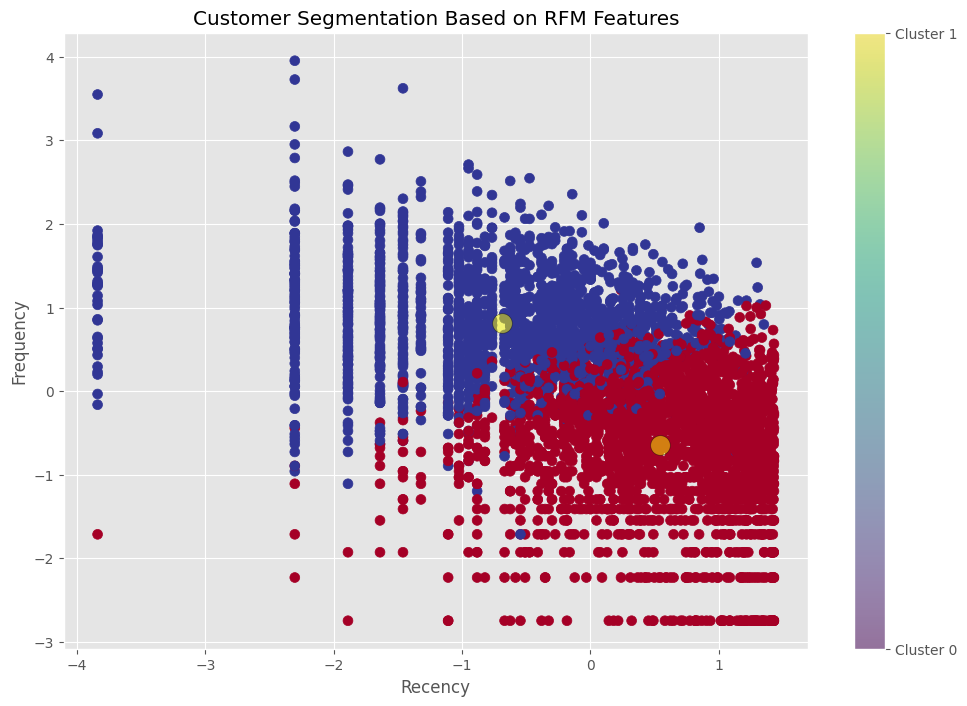

In [326]:
# Visualization of customer segmentation based On RFM features.
# Set the figure size and title for the scatter plot
plt.figure(figsize=(12,8))
plt.title('Customer Segmentation Based on RFM Features')

# Plot the scatter plot using the first two features of the input data X and the predicted cluster labels y_kmeans
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='RdYlBu')

# Get the cluster centers from the trained KMeans model and plot them as yellow circles with transparency
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='yellow', s=200, alpha=0.5, edgecolor='black')

# Set the x-axis and y-axis labels
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Add a color bar to the plot to show the correspondence between the colors and the cluster labels
color_bar = plt.colorbar()
color_bar.set_ticks(np.unique(y_kmeans))
color_bar.set_ticklabels(['Cluster {}'.format(i) for i in np.unique(y_kmeans)])

# Show the plot
plt.show()

#  K-Means with Elbow method

The Elbow Method plot is commonly used to identify the optimal number of clusters in a K-means clustering algorithm.

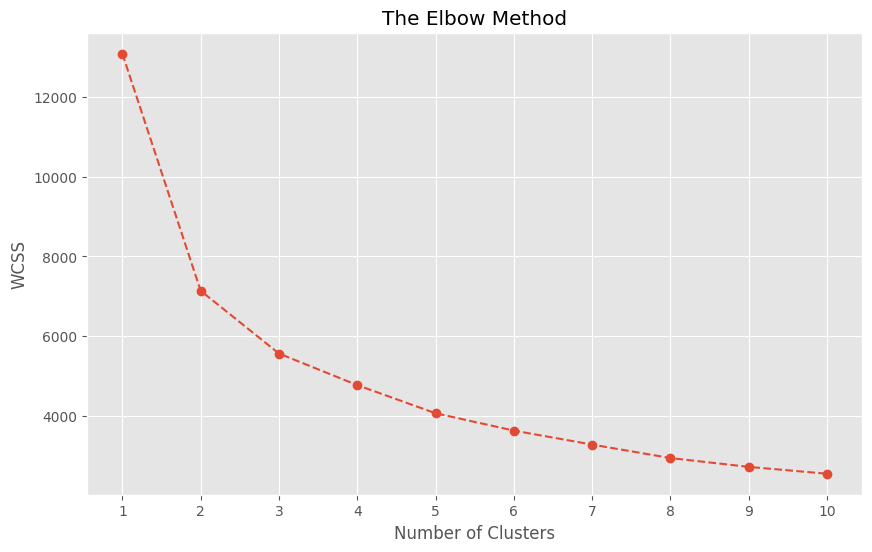

In [327]:
# Input data X

# Initialize an empty list to store the WCSS values for different number of clusters
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)  # Create a KMeans instance for each number of clusters
    kmeans.fit(X)  # Fit the KMeans model to the input data X
    wcss.append(kmeans.inertia_)  # Append the WCSS value to the list for the current number of clusters

# Plot the WCSS values against the number of clusters
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()


In [328]:
# Create an instance of the KMeans model with 2 clusters and initialize the centroids using the 'k-means++' method
KMean_clust = KMeans(n_clusters= 2, init= 'k-means++', max_iter= 1000)

# Fit the KMeans model to the data in the X variable
KMean_clust.fit(X)

# Add a new column to the rfm_df dataframe to store the cluster labels for each observation
rfm_df['Cluster'] = KMean_clust.labels_

# Display the first 10 rows of the rfm_df dataframe with the new 'Cluster' column
rfm_df.head(10)

,CustomerID,Recency,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFMScore,Cluster
0,12346.0,325,2,0.00,1,1,1,111,1
1,12347.0,2,182,4310.00,4,4,4,444,0
2,12348.0,75,31,1797.24,2,2,4,224,1
3,12349.0,18,73,1757.55,3,3,4,334,0
4,12350.0,310,17,334.40,1,1,2,112,1
5,12352.0,36,95,1545.41,3,3,3,333,0
6,12353.0,204,4,89.00,1,1,1,111,1
7,12354.0,232,58,1079.40,1,3,3,133,1
8,12355.0,214,13,459.40,1,1,2,112,1
9,12356.0,22,59,2811.43,3,3,4,334,0


### ML Model - 2 :- Agglomerative Hierarchial Clustering

Agglomerative Hierarchical Clustering is a bottom-up approach that merges similar clusters until the desired number of clusters is achieved. It uses a distance/similarity measure between data points and can create a dendrogram to visualize the merging process. It captures hierarchical relationships but can be computationally expensive for large datasets and is not suitable for high-dimensional data.

In [329]:
from sklearn.cluster import AgglomerativeClustering

# Create an instance of AgglomerativeClustering with 2 clusters, euclidean metric, and ward linkage
model = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

# Fit the input data X to the model
model.fit(X)


AgglomerativeClustering()

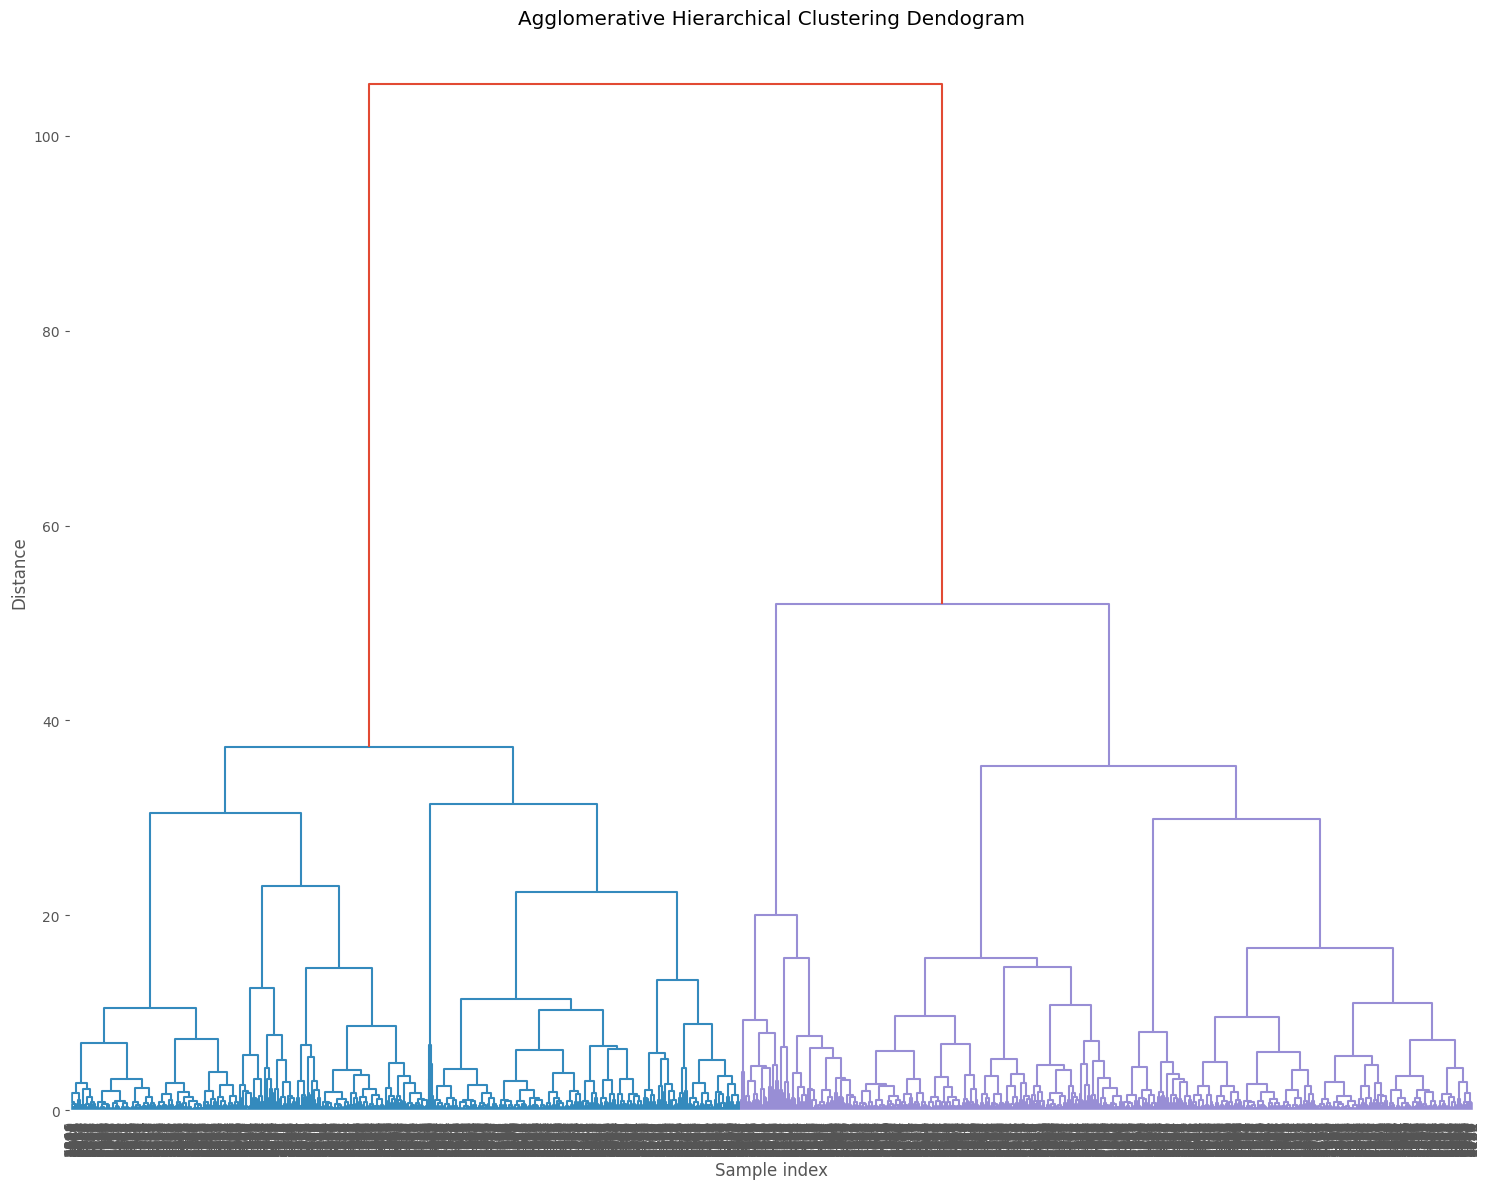

In [330]:

# Import necessary libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt

# Set the figure size and title for the dendrogram plot
plt.figure(figsize=(15, 12))
plt.title('Agglomerative Hierarchical Clustering Dendogram')

# Set the x and y-axis labels for the dendrogram plot
plt.xlabel('Sample index')
plt.ylabel('Distance')

# Create a linkage matrix using the input data X and the ward linkage method
Z = linkage(X, 'ward')

# Plot the dendrogram with specified parameters
dendrogram(Z, leaf_rotation=90.0, p=25, color_threshold=80, leaf_font_size=10, truncate_mode='level')

# Ensure tight layout of the plot
plt.tight_layout()

### ML Model - 3 :-DBSCAN (Density-Based Spatial Clustering of Applications with Noise)

DBSCAN is a density-based clustering algorithm that groups data points based on their density in the feature space. It identifies clusters as dense regions separated by areas of lower density and is robust to noise and outliers. It doesn't require specifying the number of clusters in advance. Its parameters include the radius (Eps) and minimum number of points (MinPts) to form a core point.

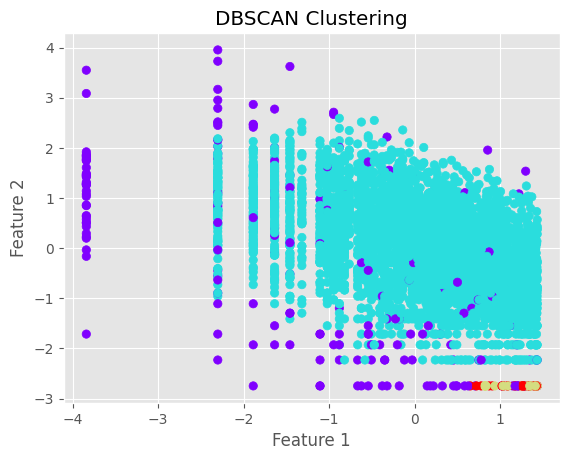

In [331]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.5, min_samples=15)
dbscan.fit(X)

# Plot the results
plt.scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap='rainbow')
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

- The chart used is a scatter plot, which is a suitable choice for visualizing the clustering results of DBSCAN. The x and y axes represent the two features of the dataset, and the points are colored based on their assigned cluster labels.

- The insights gained from the chart include identifying the clusters formed by the DBSCAN algorithm and their density. The points that are closer to each other are assigned to the same cluster, and the outliers or noise points are labeled as -1. By observing the distribution of the points and the density of the clusters, we can understand the structure and characteristics of the data, and potentially find any patterns or anomalies.

- The gained insights can help in creating a positive business impact by identifying groups of similar data points, which can aid in targeting specific segments of customers or optimizing operational processes.

# summary table

In [332]:
# Import necessary libraries
from prettytable import PrettyTable

# Initialize the table with specified column names
myTable = PrettyTable(['SL No.', "Model_Name", 'Data', "Optimal_Number_of_cluster"])

# Add rows to the table
myTable.add_row(['1', "K-Means with silhouette_score", "RFM", "2"])
myTable.add_row(['2', "K-Means with Elbow method", "RFM", "2"])
myTable.add_row(['3', "Hierarchical clustering", "RFM", "2"])
myTable.add_row(['4',"DBSCAN ", "RFM", "3"])

# Print the table
print(myTable)

+--------+-------------------------------+------+---------------------------+
| SL No. |           Model_Name          | Data | Optimal_Number_of_cluster |
+--------+-------------------------------+------+---------------------------+
|   1    | K-Means with silhouette_score | RFM  |             2             |
|   2    |   K-Means with Elbow method   | RFM  |             2             |
|   3    |    Hierarchical clustering    | RFM  |             2             |
|   4    |            DBSCAN             | RFM  |             3             |
+--------+-------------------------------+------+---------------------------+


# **Conclusion**

**EDA**

- Null values and duplicates were removed from the dataset before applying clustering.

- Top customer IDs were found to be 17841.0, 14911.0, 14096.0, 12748.0, and 14606.0.

- The top five countries based on the percentage of total orders were the United Kingdom (88.95%), Germany (2.33%), France (1.84%), Ireland (1.84%), and Spain (0.62%).

- The top five products purchased based on frequency were White Hanging Heart T-Light Holder, Regency Cakestand 3 Tier, Jumbo Bag Red Retrospot, Party Bunting, and Assorted Colour Bird Ornament.

- The top stock codes based on count values were 85123A, 22423, 85099B, 47566, and 84879.

- New columns were created using InvoiceDate, such as Year, Month, Day, Hour, Month_Num, and Day_Num.

- The total amount of each order was calculated using the product of unit price and quantity.

- The months of November, October, December, September, and May generated the most business.

- The most popular purchasing days were Thursday, Wednesday, Tuesday, Monday, Saturday, and Friday.

- Most customers made purchases between 10:00 A.M. and 2:00 P.M.

- The top time duration for purchasing was found to be afternoon, followed by morning and evening.

**Algorithm**
- RFM (Recency, Frequency, and Monetary) dataframe helps in solving problems in a particular order, making it easy to recommend and display new products to selected customers.

- Different clustering algorithms were applied to the dataset, including: Clustering on Recency, Frequency & Monetary (RFM) with 2 clusters.

1. K-Means with Silhouette_score
2. K-Means with Elbow Method
3. Hierarchical Clustering
4. DBSCAN

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***